<a href="https://colab.research.google.com/github/Wilkingc/ddc-datascience/blob/main/Project_3_SQlite_Chinook_PJ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3A


## Project Description


## Setting up enviroment and loading the data

### Imports


Let's import Bash and SQlite3

In [ ]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [ ]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


Here we unzip the dataset

In [ ]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


Let's use the comand line to make sure Chinook is in our directory

In [ ]:
!ls -l

total 1168
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 29 02:17 chinook.zip
drwxr-xr-x 1 root root   4096 Sep 20 13:22 sample_data
-rw-r--r-- 1 root root      0 Oct 29 02:17 your_database.db


### Dataset characteristics

In [ ]:
%%script sqlite3 --column --header chinook.db
.tables


albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [ ]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

How many tables do we have and how many rows are in each one of them?

In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT 'albums' AS table_name, COUNT(*) AS row_count FROM albums
UNION ALL
SELECT 'artists' AS table_name, COUNT(*) AS row_count FROM artists
UNION ALL
SELECT 'customers' AS table_name, COUNT(*) AS row_count FROM customers
UNION ALL
SELECT 'employees' AS table_name, COUNT(*) AS row_count FROM employees
UNION ALL
SELECT 'genres' AS table_name, COUNT(*) AS row_count FROM genres
UNION ALL
SELECT 'invoice_items' AS table_name, COUNT(*) AS row_count FROM invoice_items
UNION ALL
SELECT 'invoices' AS table_name, COUNT(*) AS row_count FROM invoices
UNION ALL
SELECT 'media_types' AS table_name, COUNT(*) AS row_count FROM media_types
UNION ALL
SELECT 'playlist_track' AS table_name, COUNT(*) AS row_count FROM playlist_track
UNION ALL
SELECT 'playlists' AS table_name, COUNT(*) AS row_count FROM playlists
UNION ALL
SELECT 'tracks' AS table_name, COUNT(*) AS row_count FROM tracks;

table_name      row_count
--------------  ---------
albums          347      
artists         275      
customers       59       
employees       8        
genres          25       
invoice_items   2240     
invoices        412      
media_types     5        
playlist_track  8715     
playlists       18       
tracks          3503     


Query the info of artists table

In [ ]:
%%script sqlite3 --column --header chinook.db

PRAGMA table_info(artists);

cid  name      type           notnull  dflt_value  pk
---  --------  -------------  -------  ----------  --
0    ArtistId  INTEGER        1                    1 
1    Name      NVARCHAR(120)  0                    0 


Let's display the customers table

In [ ]:
  # Select the first 10 entries from the employees table
%%script sqlite3 --column --header chinook.db
select *
from customers
limit 10


CustomerId  FirstName  LastName     Company                                           Address                               City                 State  Country         PostalCode  Phone               Fax                 Email                     SupportRepId
----------  ---------  -----------  ------------------------------------------------  ------------------------------------  -------------------  -----  --------------  ----------  ------------------  ------------------  ------------------------  ------------
1           Luís       Gonçalves    Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170       São José dos Campos  SP     Brazil          12227-000   +55 (12) 3923-5555  +55 (12) 3923-5566  luisg@embraer.com.br      3           
2           Leonie     Köhler                                                         Theodor-Heuss-Straße 34               Stuttgart                   Germany         70174       +49 0711 2842222                        leo

## Let's ask some questions about this Dataset

When did we hire the first employee?

In [ ]:
%%script sqlite3 --column --header chinook.db

select min(hiredate)
from employees

min(hiredate)      
-------------------
2002-04-01 00:00:00


What's the name of the first hired and the city where they're from?

In [ ]:
%%script sqlite3 --column --header chinook.db

select city, firstname,lastname
from employees
where hiredate = '2002-04-01 00:00:00'

City     FirstName  LastName
-------  ---------  --------
Calgary  Jane       Peacock 


What's the name of the GM?

In [ ]:
%%script sqlite3 --column --header chinook.db

select firstname, lastname
from employees
where title = 'General Manager'

FirstName  LastName
---------  --------
Andrew     Adams   


What's the average unit price for tracks in the latin genre?

In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT AVG(tracks.unitprice)
from tracks
JOIN genres
ON tracks.genreId = genres.genreId
WHERE genres.name = 'Latin';

AVG(tracks.unitprice)
---------------------
0.990000000000007    


How many invoices greater than $10 do we have?

In [ ]:
%%script sqlite3 --column --header chinook.db

select count(customers.customerid)
from customers
join invoices
on customers.customerid = invoices.customerid
where invoices.customerid > 10

count(customers.customerid)
---------------------------
342                        


Which customers did these transactions?

In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT customers.customerid,customers.firstname, customers.lastname
FROM customers
JOIN invoices
ON customers.customerid = invoices.customerid
GROUP BY customers.customerid
HAVING COUNT(invoices.invoiceid) > 10;

Which one is the longest track and by who?

In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT max(milliseconds),(tracks.name)
FROM playlists
JOIN playlist_track
ON playlists.playlistid = playlist_track.playlistid
JOIN tracks
ON playlist_track.trackid = tracks.trackid
limit 10



max(milliseconds)  Name                  
-----------------  ----------------------
5286953            Occupation / Precipice


When did the lowest purchase happen?

In [ ]:
%%script sqlite3 --column --header chinook.db
select min(invoicedate)
from invoices
limit 10

min(invoicedate)   
-------------------
2009-01-01 00:00:00


Which, When and from where is the customer with the highest payment made?

In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT

[customers].[customerid],
customers.FirstName,
(customers.Lastname),
(customers.country),
max(invoices.total),
invoices.invoicedate

FROM customers

join invoices

on customers.customerid = invoices.customerid
limit 10




CustomerId  FirstName  LastName  Country         max(invoices.total)  InvoiceDate        
----------  ---------  --------  --------------  -------------------  -------------------
6           Helena     Holý      Czech Republic  25.86                2013-11-13 00:00:00


How many invoices did we have the first 3 days of the month of January of 2009?

In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT *
FROM invoices
WHERE invoicedate BETWEEN '2009-01-01 00:00:00' AND '2009-01-03 00:00:00'
limit 5

InvoiceId  CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94 


How many invoices were generated the first month?

In [ ]:

%%script sqlite3 --column --header chinook.db
SELECT COUNT(*) AS invoice_count
FROM invoices
WHERE strftime('%Y-%m', invoicedate) = '2009-01';

invoice_count
-------------
6            


Display each employee with the person they report to

In [ ]:
%%script sqlite3 --column --header chinook.db

with
emp as (
  select EmployeeID, FirstName, Lastname, ReportsTo
  from employees
)

select *
from emp
limit 10


EmployeeID  FirstName  Lastname  ReportsTo
----------  ---------  --------  ---------
1           Andrew     Adams              
2           Nancy      Edwards   1        
3           Jane       Peacock   2        
4           Margaret   Park      2        
5           Steve      Johnson   2        
6           Michael    Mitchell  1        
7           Robert     King      6        
8           Laura      Callahan  6        


How many customers firstname start with the letter A?

In [ ]:
%%script sqlite3 --column --header chinook.db

SELECT FirstName AS name
FROM customers
WHERE name LIKE 'A%'
;


name     
---------
Astrid   
Alexandre
Aaron    


## Visualization

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

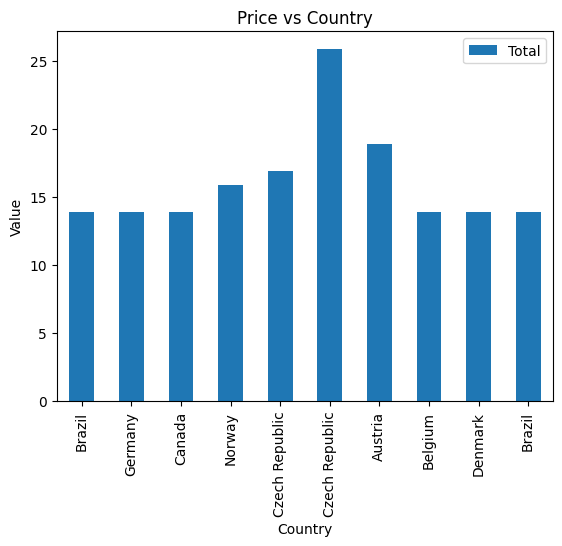

In [ ]:
query = """
SELECT

[customers].[customerid],
customers.FirstName,
(customers.Lastname),
(customers.country),
(invoices.total),
invoices.invoicedate

FROM customers

join invoices

on customers.customerid = invoices.customerid
Where invoices.total > 12
limit 10
"""
cursor.execute(query)
results = cursor.fetchall()
df = pd.DataFrame(results, columns=[description[0] for description in cursor.description])
df.plot.bar(x='Country', y='Total')
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Price vs Country')
plt.show()

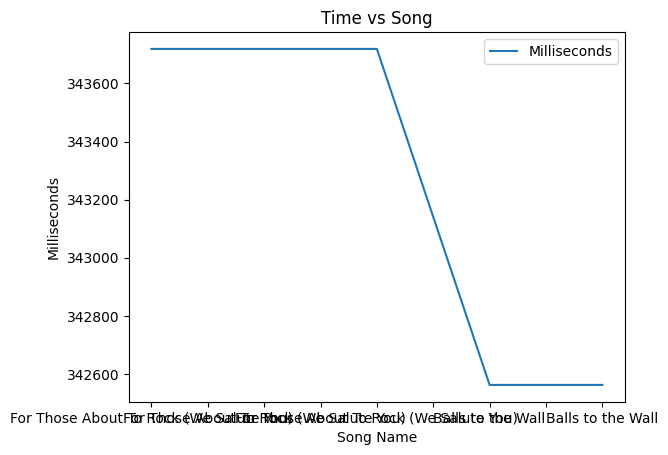

In [ ]:
query = """

SELECT (tracks.milliseconds),(tracks.name) as names
FROM playlists
JOIN playlist_track
ON playlists.playlistid = playlist_track.playlistid
JOIN tracks
ON playlist_track.trackid = tracks.trackid

limit 5

"""
cursor.execute(query)
results = cursor.fetchall()
df1 = pd.DataFrame(results, columns=[description[0] for description in cursor.description])
df1.plot(x='names', y='Milliseconds')
plt.xlabel('Song Name')
plt.ylabel('Milliseconds')
plt.title('Time vs Song')
plt.show()

In [ ]:
df1

,Milliseconds,names
0,343719,For Those About To Rock (We Salute You)
1,343719,For Those About To Rock (We Salute You)
2,343719,For Those About To Rock (We Salute You)
3,342562,Balls to the Wall
4,342562,Balls to the Wall
